In [37]:
# importing necessary liabrary to analyse and understand various data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings

As a Cricket World Cup 2019 is going on, i could not stop myself to do some analysis of cricket matches. Following are the questions consider for data analysis.

Question 1: Which of the team has highest wins?

Question 2 : Which of the team has most percentage of wins?

Question 3: Is it any advantage of being host?

Question 4: How much advantage taken by each country as a host?

Question 5: What is the percentage of winning by innings.

Question 6: Who have more 'wins' at a neutral place.

After finding answer it may help cricket analyser to find out strength and weakness of opponent teams.

Start analysis by reading values.

In [39]:
# Read the dataset for further processing
original_dataset=pd.read_csv('./ContinousDataset.csv')
original_dataset.head(10)

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
5,5,ODI # 6,England,New Zealand,Winner2ndInning,Swansea,"Jul 18, 1973",England,England,Home,Away,Second,First
6,6,ODI # 8,England,West Indies,Winner2ndInning,Leeds,"Sep 5, 1973",England,England,Home,Away,Second,First
7,7,ODI # 9,England,West Indies,Winner2ndInning,The Oval,"Sep 7, 1973",West Indies,England,Home,Away,First,Second
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
9,9,ODI # 11,New Zealand,Australia,Winner1stInning,Christchurch,"Mar 31, 1974",Australia,New Zealand,Home,Away,Second,First


In [41]:
# Get to know what are the types of variable in each column
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
Unnamed: 0       7494 non-null int64
Scorecard        7494 non-null object
Team 1           7494 non-null object
Team 2           7494 non-null object
Margin           7494 non-null object
Ground           7494 non-null object
Match Date       7494 non-null object
Winner           7494 non-null object
Host_Country     7364 non-null object
Venue_Team1      7494 non-null object
Venue_Team2      7494 non-null object
Innings_Team1    7494 non-null object
Innings_Team2    7494 non-null object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


Looking at the information from choosen dataset, it find that all column except one have 'object' type of variables. But when 'Margin' column find in datail it has only two component. And it represent which innings wins the match. So this column in converted into two values. Also we have see dataset have any 'NAN' value, if it present then particular value must be removed for analysis of data.  

In [8]:
# Looking the columns name to understand what are the contents in the file
print(original_dataset.columns)
print(original_dataset.shape)

Index(['Unnamed: 0', 'Scorecard', 'Team 1', 'Team 2', 'Margin', 'Ground',
       'Match Date', 'Winner', 'Host_Country', 'Venue_Team1', 'Venue_Team2',
       'Innings_Team1', 'Innings_Team2'],
      dtype='object')
(7494, 13)


In [14]:
# Look if any NAN value is present dataset
missing_check=original_dataset.isnull().sum()
print(missing_check)

Unnamed: 0         0
Scorecard          0
Team 1             0
Team 2             0
Margin             0
Ground             0
Match Date         0
Winner             0
Host_Country     130
Venue_Team1        0
Venue_Team2        0
Innings_Team1      0
Innings_Team2      0
dtype: int64


In [21]:
# Repacing values of 'Margin' column into integer value. Again replacing doesnt necessary but for simplicity it is replaced.
original_dataset['Margin'].replace(['Winner1stInning','Winner2ndInning'],[1,0],inplace=True)

print(original_dataset['Margin'].value_counts())

0    3814
1    3680
Name: Margin, dtype: int64


In [9]:
# Question 1: Which of the team has highest wins.
# Counting how much win by each country.
contry_wins=original_dataset.Winner.value_counts()
print(contry_wins)

Australia       1104
India            950
Pakistan         932
West Indies      760
Sri Lanka        742
South Africa     722
England          686
New Zealand      648
Zimbabwe         258
Bangladesh       210
Ireland          102
Afghanistan       84
Kenya             84
Scotland          62
Netherlands       56
Canada            34
U.A.E.            18
Bermuda           14
Hong Kong         12
P.N.G.            10
U.S.A.             2
Namibia            2
East Africa        2
Name: Winner, dtype: int64


In [43]:
# Looking for how much matches played by each country
cntry=['India','Australia','Pakistan','West Indies','Sri Lanka','South Africa','England','New Zealand','Zimbabwe',
       'Bangladesh','Ireland','Afghanistan','Kenya','Scotland','Netherlands','Canada','U.A.E.','Bermuda','Hong Kong',
       'P.N.G.','East Africa' ,'U.S.A.','Namibia']
j={}
count=0
for i in cntry:
    j[count]=(original_dataset[['Team 1','Team 2']]==i).sum().sum()
    count=count+1
print(j)


{0: 1760, 1: 1718, 2: 1708, 3: 1462, 4: 1532, 5: 1122, 6: 1328, 7: 1372, 8: 948, 9: 656, 10: 226, 11: 162, 12: 298, 13: 174, 14: 144, 15: 150, 16: 70, 17: 72, 18: 36, 19: 20, 20: 8, 21: 6, 22: 16}


In [45]:
#Question 2 : Which of the team has most percentage of wins.

percen={}
for i in range(len(cntry)):
    percen[i]=(contry_wins[cntry[i]])/j[i]*100

new_df=pd.DataFrame.from_dict(percen,orient='index',columns=['Country'])
print(new_df)

      Country
0   53.977273
1   64.260768
2   54.566745
3   51.983584
4   48.433420
5   64.349376
6   51.656627
7   47.230321
8   27.215190
9   32.012195
10  45.132743
11  51.851852
12  28.187919
13  35.632184
14  38.888889
15  22.666667
16  25.714286
17  19.444444
18  33.333333
19  50.000000
20  25.000000
21  33.333333
22  12.500000


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

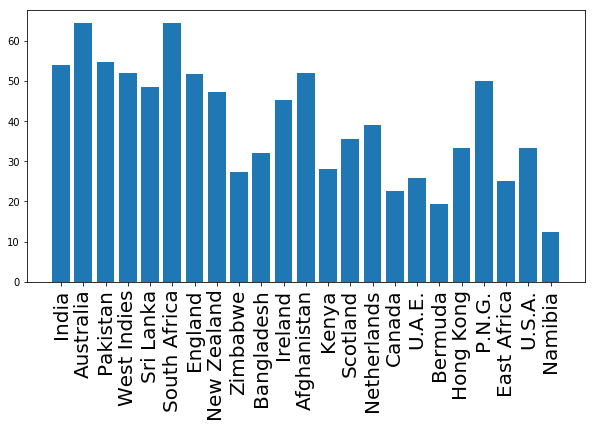

In [51]:
dictionary=plt.figure(figsize=(10,5))
plt.bar(range(len(percen)),percen.values())
y=np.arange(len(cntry))
plt.xticks(y,cntry,rotation=90,fontsize=20)
y

Looking at the graph, it clears that 'Australia' and 'South Africa' is dominating cricket field. Though 'Afganistan' & 'P.N.G' also have very good average percentage of winnning match, they played less number of matches. India, Australia,Pakistan, West-Indies, South africa & England have more than 50% of winning rate, it is obvious that each of these country have at least one time world champion. 

In [60]:
#Question 3: Is it any advantage of being host

matching=0
count=0
count1=0
notmatching=0
for i in range (len(original_dataset)):
    if ((original_dataset['Venue_Team1'][i]=='Home') or (original_dataset['Venue_Team2'][i]=='Home')):
        count=count+1
        if (original_dataset['Winner'][i]==original_dataset['Host_Country'][i]):
            matching=matching+1
        else:
            notmatching=notmatching+1
    else:
        count1=count1+1
print("The number of matches played as a being host=",count)
print("Matches win by host country=",matching)
print("Matches loss by host country=",notmatching)
print("Percentage of wins as a host=",(round(matching*100/count)))

The number of matches played as a being host= 5218
Matches win by host country= 3028
Matches loss by host country= 2190
Percentage of wins as a host= 58


From above obtained result, it slightly clears that being host is make advantage to the country. Because host country has advantage of fan's support, host team know the playing condition very well, also host team knows the condition of pitch how it behaves in various whether condition.
    Now our next part is which team rules as a host.

In [65]:
#Question 4: How much advantage taken by each country as a host?
# To find how many matches played and wins by every team as a host 
count=0
count1={}
win=0
win1={}
for j in range(len(cntry)):

    for i in range (len(new_dataset)): 
        if ((original_dataset['Venue_Team1'][i]=='Home')or((original_dataset['Venue_Team2'][i]=='Home'))):
            if(original_dataset['Team 1'][i]==cntry[j]) or (original_dataset['Team 2'][i]==cntry[j]):
                count=count+1
                if(original_dataset['Winner'][i]==cntry[j]):
                    win=win+1
    count1[j]=count
    win1[j]=win
    count=0
    win=0

print("Printing No. of matches played as a host by each country=\n",count1)
print("\nPrinting No. of matches wins as a host by each country=\n",win1)

Printing No. of matches played as a host by each country=
 {0: 1159, 1: 1392, 2: 925, 3: 1001, 4: 945, 5: 818, 6: 1069, 7: 992, 8: 685, 9: 518, 10: 139, 11: 79, 12: 196, 13: 97, 14: 74, 15: 64, 16: 31, 17: 32, 18: 14, 19: 6, 20: 2, 21: 0, 22: 2}

Printing No. of matches wins as a host by each country=
 {0: 607, 1: 870, 2: 490, 3: 515, 4: 493, 5: 526, 6: 535, 7: 464, 8: 183, 9: 174, 10: 60, 11: 40, 12: 62, 13: 33, 14: 28, 15: 12, 16: 10, 17: 8, 18: 8, 19: 2, 20: 0, 21: 0, 22: 0}


In [66]:
per_wi_home={}
for i in range(len(cntry)-3):
    per_wi_home[i]=round((win1[i]/count1[i])*100)
print(per_wi_home)

{0: 52, 1: 62, 2: 53, 3: 51, 4: 52, 5: 64, 6: 50, 7: 47, 8: 27, 9: 34, 10: 43, 11: 51, 12: 32, 13: 34, 14: 38, 15: 19, 16: 32, 17: 25, 18: 57, 19: 33}


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

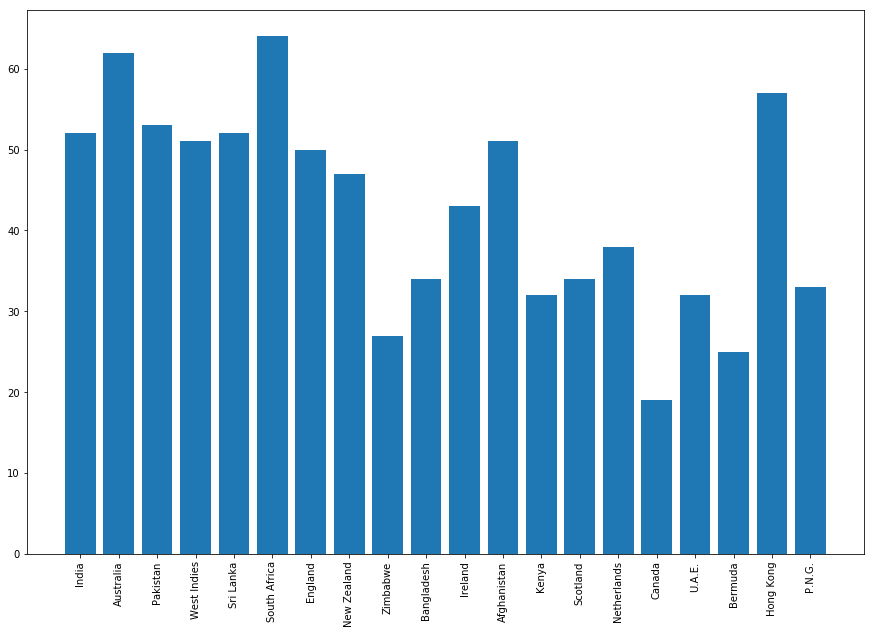

In [71]:
dictionary=plt.figure(figsize=(15,10))
plt.bar(range(len(per_wi_home)),per_wi_home.values(),align='center')
y=np.arange(len(cntry)-3)
plt.xticks(y,cntry,rotation=90)
y


Above graph shows that who have more number of wins as a being host. Australia and South Africa have more number of wins in form of percentage as a host. India. Pakistan, West-Indies, Sri Lanka, England have moderate record as host. Australi and South Afrika look good ata their playing condition. The whether, ground in these two contries also differ than other countries, so this may be reason gets another advantage when playing in their home condition.  

In [72]:
new_dataset=original_dataset.dropna().reset_index(drop=True)

In [73]:
new_dataset.shape

(7364, 13)

In [86]:
#Question 5: What is the percentage of winning by innings.
[a,b]=original_dataset['Margin'].value_counts()
print("Winner when batted as a second=",a)
print("Winner when batted as a first=",b)
print("Percentage of wins in secondd inning",(a/(a+b)*100))
print("Percentage of wins in first inning",(b/(a+b)*100))

Winner when batted as a second= 3814
Winner when batted as a first= 3680
Percentage of wins in secondd inning 50.89404857219109
Percentage of wins in first inning 49.10595142780891


From above result, it clears that their is not much difference when batted as a either 'first' or 'second'. 
While batting first, batsmens have not to chase any target. So they are free to get any score passible.
Batting second, batsmen have to achieve target which is set. So batting first or second have some advantage , also at the same time some disadvatange also.

In [89]:
#Question 6: Who have more 'wins' at a neutral place.
# Counting no of played matches and no of wins at neutral place.
count=0
count1={}
win=0
win1={}
for j in range(len(cntry)):

    for i in range (len(new_dataset)): 
        if (new_dataset['Venue_Team1'][i]=='Neutral'):
            if(new_dataset['Team 1'][i]==cntry[j]) or (new_dataset['Team 2'][i]==cntry[j]):
                count=count+1
                if(new_dataset['Winner'][i]==cntry[j]):
                    win=win+1
    count1[j]=count
    win1[j]=win
    count=0
    win=0

print("No. of played matches at neutral place by each country:\n ",count1)
print("\nNo. of wins at neutral place by each country:\n",win1)

No. of played matches at neutral place by each country:
  {0: 530, 1: 292, 2: 730, 3: 432, 4: 512, 5: 256, 6: 232, 7: 340, 8: 238, 9: 122, 10: 78, 11: 76, 12: 102, 13: 74, 14: 68, 15: 86, 16: 32, 17: 40, 18: 18, 19: 8, 20: 6, 21: 6, 22: 14}

No. of wins at neutral place by each country:
 {0: 300, 1: 210, 2: 420, 3: 234, 4: 212, 5: 166, 6: 134, 7: 166, 8: 68, 9: 32, 10: 40, 11: 40, 12: 22, 13: 28, 14: 28, 15: 22, 16: 4, 17: 6, 18: 2, 19: 6, 20: 2, 21: 2, 22: 2}


In [94]:
per_wi_neutral={}
for i in range(len(cntry)):
    per_wi_neutral[i]=round((win1[i]/count1[i])*100)
print(per_wi_neutral)

{0: 57, 1: 72, 2: 58, 3: 54, 4: 41, 5: 65, 6: 58, 7: 49, 8: 29, 9: 26, 10: 51, 11: 53, 12: 22, 13: 38, 14: 41, 15: 26, 16: 12, 17: 15, 18: 11, 19: 75, 20: 33, 21: 33, 22: 14}


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

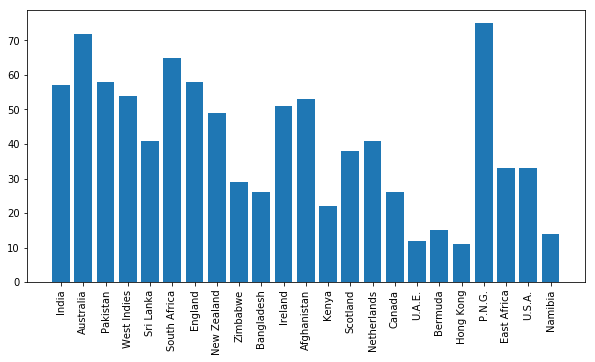

In [92]:
dictionary=plt.figure(figsize=(10,5))
plt.bar(range(len(per_wi_neutral)),per_wi_neutral.values(),align='center')
y=np.arange(len(cntry))
plt.xticks(y,cntry,rotation=90)
y

Look, again at a neutral place Australia is leading by other countries. Thats why they are 5 times world champion. They are leading at every stage of the game. Last 10 column also have very good record but they have played very few matches. Also other countries like India, South Africa, England, Pakistan have very good record at neutral place.  